## Model Improvement

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston

/Users/christineiskander/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Import the DF

In [3]:
whole_df=pd.read_csv("Cars_new_model_improved.csv")
whole_df

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,...,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,4809,48029,61,7,52,0,9,292,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2228,26794,64,3,26,0,1,744,0,...,1,0,1,0,0,0,0,0,1,0
2,2,14947,22139,100,34,31,0,2,480,1,...,0,0,1,0,0,0,1,0,1,0
3,3,22332,49078,97,10,3,0,2,484,0,...,0,1,0,0,0,0,0,0,1,0
4,4,9025,23675,117,15,31,1,7,707,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214,0,...,0,0,0,1,1,0,0,0,1,0
10685,10685,5259,61146,65,7,68,0,6,273,0,...,0,1,0,0,0,0,0,0,1,0
10686,10686,23893,39837,201,11,63,0,2,381,0,...,0,0,0,1,1,0,0,0,1,0
10687,10687,11971,64195,158,0,27,4,6,618,0,...,0,1,0,0,0,0,1,0,1,0


## X-Y Split

In [4]:
X=whole_df.drop(["total_claim_amount","Unnamed: 0"], axis=1)
y=whole_df.total_claim_amount
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [5]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [6]:
# Standardize the data (after the data split).

std_scaler=StandardScaler().fit(X_train)  
X_train_scaled=std_scaler.transform(X_train)

X_train_scaled

array([[-0.11021627, -1.2632667 , -0.67143823, ...,  1.95232568,
         0.65494534, -0.48945135],
       [-0.42794064, -1.36853038, -0.72925469, ...,  1.95232568,
        -1.52684497,  2.04310398],
       [-0.5223013 ,  0.26299646,  0.48489091, ..., -0.51220962,
         0.65494534, -0.48945135],
       ...,
       [-0.81132612, -1.16342071, -0.90270406, ...,  1.95232568,
        -1.52684497,  2.04310398],
       [ 2.25575772,  0.97656622, -0.78707115, ..., -0.51220962,
         0.65494534, -0.48945135],
       [ 1.18923585, -0.01438919, -0.55580532, ..., -0.51220962,
         0.65494534, -0.48945135]])

In [7]:
X_train.shape

(7482, 41)

In [8]:
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled

array([[-0.40967729, -0.94647238, -0.61362178, ...,  1.95232568,
         0.65494534, -0.48945135],
       [-0.7597249 , -0.93254692, -0.64253   , ..., -0.51220962,
         0.65494534, -0.48945135],
       [ 0.57248529, -1.22437973, -0.90270406, ...,  1.95232568,
         0.65494534, -0.48945135],
       ...,
       [-0.79857077,  0.60844433, -0.58471355, ...,  1.95232568,
         0.65494534, -0.48945135],
       [-0.42547654, -0.96649777, -0.81597938, ...,  1.95232568,
         0.65494534, -0.48945135],
       [-0.49881985, -0.94988352,  0.71615674, ...,  1.95232568,
        -1.52684497, -0.48945135]])

In [9]:
X.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'region_east',
       'region_north west', 'region_west region', 'response_yes',
       'coverage_extended', 'coverage_premium', 'education_college',
       'education_doctor', 'education_high school or below',
       'education_master', 'month_jan', 'employment_status_employed',
       'employment_status_medical leave', 'employment_status_retired',
       'employment_status_unemployed', 'gender_m', 'location_code_suburban',
       'location_code_urban', 'marital_status_married',
       'marital_status_single', 'policy_type_personal auto',
       'policy_type_special auto', 'renew_offer_type_offer2',
       'renew_offer_type_offer3', 'renew_offer_type_offer4',
       'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'vehicle_class_luxury', 'vehicle_class_sports car'

## Apply linear regression.

In [10]:
model=LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Model Interpretation

In [11]:
model.coef_

array([-6.59090967e-03, -4.83786280e+00,  1.79277167e+02,  4.91616103e+00,
        4.75485923e-01,  1.97375797e+00, -1.06946024e+00,  2.67059810e+00,
       -1.44327563e-01,  3.05530065e+00, -9.10329610e+00, -5.61678748e+00,
       -3.96982971e+00, -3.61874052e+00, -3.33150089e+00,  2.39343735e+00,
       -3.41479499e+00, -7.41179207e-01, -2.86596719e+00,  3.82017392e+00,
        1.31254660e-01,  3.78784641e+01,  7.76587454e+00,  1.83919035e+02,
        8.48076946e+01, -6.18496099e-01,  3.06714278e+01, -4.34199159e-01,
        1.72798476e+00,  6.95241464e+00,  3.98229870e+00,  2.22009212e+00,
        1.07781739e+00, -6.18540225e-01, -1.31645701e+00,  2.50038098e+00,
       -4.87402373e+00, -6.05187423e+00,  3.52790446e-02, -3.63159430e+00,
       -6.49309771e-01])

In [12]:
model.intercept_

433.0597433841219

In [13]:
model.score(X_test_scaled,y_test)

0.7704475531486071

## Predicting

In [14]:
y_pred=model.predict(X_test_scaled)
y_pred

array([466.09340073, 397.48491033, 128.48161581, ..., 569.04292288,
       -18.03195397, 470.78478953])

In [15]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [16]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
4665,345,466.093401
4072,345,397.484910
4549,257,128.481616
4211,445,382.566260
3081,523,418.578923
...,...,...
3488,404,352.215737
1667,554,536.266800
1516,350,569.042923
10215,27,-18.031954


### Plotting y and y-predict

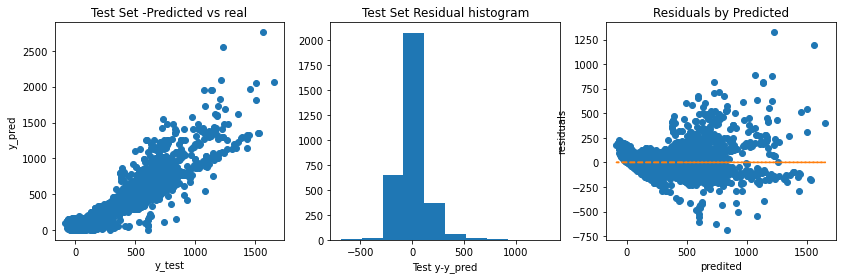

In [17]:
# scatter plot y_pred vs y
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# histogram of the residuals between y - y_pred. 
# Homoscdasticity
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## Evaluation of the Model

In [18]:
# MSE - Mean Square Error
mse(y_test,y_pred)

19148.122959712444

In [19]:
# RMSE - Root Mean Square Error
mse(y_test, y_pred, squared=False)

138.37674284254723

In [20]:
# MAE - Mean Absolute Error
mae (y_test, y_pred)

95.80407977433873

In [21]:
# R2 - percentage of how good the model is
R2=r2_score(y_test,y_pred)
R2

0.7704475531486071

In [22]:
# Adjusted R2
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7674738879603269

### Feature Importance

In [23]:
features_importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': abs(model.coef_)})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
23,location_code_suburban,183.919035
2,monthly_premium_auto,179.277167
24,location_code_urban,84.807695
21,employment_status_unemployed,37.878464
26,marital_status_single,30.671428
10,response_yes,9.103296
22,gender_m,7.765875
29,renew_offer_type_offer2,6.952415
37,vehicle_class_suv,6.051874
11,coverage_extended,5.616787


In [24]:
X_train_const_scaled = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled)
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     608.8
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        10:00:45   Log-Likelihood:                -47640.
No. Observations:                7482   AIC:                         9.536e+04
Df Residuals:                    7440   BIC:                         9.565e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.634    265.039      0.0

## Lasso and Ridge

1. Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

### Linear Regression

In [25]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.7703690175950475, Test -> 0.770447553148607


### Lasso

In [26]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7703576906337042, Test -> 0.7705856255491054


### Ridge

In [36]:
model=Ridge(alpha=0.99)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7703684365986284, Test -> 0.7704623694025219


### ElasticNet

In [28]:
model=ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.7441556075210191, Test -> 0.7456186302344885


In [29]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
def model_comparison():
    user_input=input("Which Model you want to check? ")
    if user_input== "LinearRegression":
        model=LinearRegression()
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
    elif user_input== "Ridge":
        model=Ridge(alpha=0.95)
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
    else:
        model=Lasso(alpha=0.05)
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
        
        

In [30]:
model_comparison()

Which Model you want to check? Ridge
Ridge: Train -> 0.7703684824707111, Test -> 0.7704617992788028


3. Use feature selection techniques to select subset of features to train the model with(if necessary).

In [31]:
X_added_constant=sm.add_constant(X)
X_added_constant

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,...,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,1.0,4809,48029,61,7,52,0,9,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,2228,26794,64,3,26,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,1.0,14947,22139,100,34,31,0,2,1,0,...,0,0,1,0,0,0,1,0,1,0
3,1.0,22332,49078,97,10,3,0,2,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1.0,9025,23675,117,15,31,1,7,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,15563,64811,253,8,40,2,7,0,0,...,0,0,0,1,1,0,0,0,1,0
10685,1.0,5259,61146,65,7,68,0,6,0,1,...,0,1,0,0,0,0,0,0,1,0
10686,1.0,23893,39837,201,11,63,0,2,0,0,...,0,0,0,1,1,0,0,0,1,0
10687,1.0,11971,64195,158,0,27,4,6,0,0,...,0,1,0,0,0,0,1,0,1,0


In [32]:
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     874.4
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        10:00:53   Log-Likelihood:                -67987.
No. Observations:               10689   AIC:                         1.361e+05
Df Residuals:                   10647   BIC:                         1.364e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -349.7525     13.259    -26.379      0.000    -375.742    -323.763
customer_lifetime_value         -8.105e-05      0.000     -0.373      0.709      -0.001       0.000
income                             -0.0003   6.25e-05     -4.341      0.000      -0.000      -0.000
monthly_premium_auto                5.1628      0.118     43.648      0.000       4.931       5.395
months_since_last_claim             0.3758      0.135      2.781      0.005       0.111       0.641
months_since_policy_inception      -0.0021      0.049     -0.042      0.967      -0.098       0.094
number_of_open_complaints          -1.4956      1.490     -1.004      0.315      -4.415       1.424
number_of_policies                  0.6964      0.571      1.220      0.223      -0.423       1.816
region_east                         6.6036      5.270      1.253      0.210      -3.728      16.935
region_north west                  -3.2533      3.598     -0.904      0.366     -10.306       3.799
region_west region                  5.4696      3.434      1.593      0.111      -1.262      12.201
response_yes                      -23.3494      4.418     -5.285      0.000     -32.009     -14.690
coverage_extended                 -11.9513      3.890     -3.072      0.002     -19.577      -4.326
coverage_premium                   -9.2498      7.520     -1.230      0.219     -23.989       5.490
education_college                  -6.8160      3.534     -1.929      0.054     -13.744       0.112
education_doctor                  -13.2801      7.580     -1.752      0.080     -28.139       1.578
education_high school or below     11.5962      3.581      3.238      0.001       4.576      18.616
education_master                   -9.6670      5.407     -1.788      0.074     -20.266       0.932
month_jan                          -0.6875      2.726     -0.252      0.801      -6.031       4.656
employment_status_employed         -9.0550      7.043     -1.286      0.199     -22.861       4.751
employment_status_medical leave    11.3382      8.992      1.261      0.207      -6.289      28.965
employment_status_retired         -10.3169     10.557     -0.977      0.328     -31.010      10.377
employment_status_unemployed       80.4766      7.439     10.818      0.000      65.894      95.059
gender_m                           15.5521      2.744      5.667      0.000      10.173      20.931
location_code_suburban            379.3902      3.937     96.367      0.000     371.673     387.107
location_code_urban               222.2374      4.483     49.576      0.000     213.450     231.024
marital_status_married             -5.0754      4.041     -1.256      0.209     -12.997       2.847
marital_status_single              66.5571      4.640     14.344      0.000      57

In [33]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()
significant_features=X_added_constant[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()]
significant_features

,const,income,monthly_premium_auto,months_since_last_claim,response_yes,coverage_extended,education_high school or below,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_single,renew_offer_type_offer2,renew_offer_type_offer3,vehicle_class_sports car,vehicle_class_suv
0,1.0,48029,61,7,0,0,0,0,1,1,0,0,0,1,0,0
1,1.0,26794,64,3,0,0,0,1,0,1,0,1,0,0,0,0
2,1.0,22139,100,34,0,0,0,0,1,1,0,1,0,1,0,1
3,1.0,49078,97,10,1,1,0,0,1,1,0,1,1,0,0,0
4,1.0,23675,117,15,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,64811,253,8,0,0,0,1,0,1,0,0,0,1,0,0
10685,1.0,61146,65,7,0,0,0,0,0,0,1,0,1,0,0,0
10686,1.0,39837,201,11,0,1,0,0,0,0,0,0,0,0,0,0
10687,1.0,64195,158,0,0,0,0,0,0,0,1,0,0,0,0,1


In [37]:
model = sm.OLS(y,significant_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     2383.
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        10:06:43   Log-Likelihood:                -68008.
No. Observations:               10689   AIC:                         1.360e+05
Df Residuals:                   10673   BIC:                         1.362e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -364.1949      6.465    -56.334      0.000    -376.867    -351.522
income                            -0.0003   5.69e-05     -5.739      0.000      -0.000      -0.000
monthly_premium_auto               5.1716      0.045    114.887      0.000       5.083       5.260
months_since_last_claim            0.3659      0.135      2.712      0.007       0.101       0.630
response_yes                     -24.6142      4.216     -5.838      0.000     -32.878     -16.350
coverage_extended                -11.2685      3.037     -3.711      0.000     -17.221      -5.316
education_high school or below    16.1128      3.036      5.308      0.000      10.162      22.064
employment_status_unemployed      87.5455      3.646     24.009      0.000      80.398      94.693
gender_m                          15.6615      2.731      5.735      0.000      10.308      21.015
location_code_suburban           381.6523      3.829     99.672      0.000     374.147     389.158
location_code_urban              222.4862      4.479     49.670      0.000     213.706     231.266
marital_status_single             70.1869      3.363     20.869      0.000      63.594      76.779
renew_offer_type_offer2           13.4566      3.130      4.299      0.000       7.321      19.592
renew_offer_type_offer3            6.3464      3.902      1.626      0.104      -1.303      13.995
vehicle_class_sports car         -25.0248      6.324     -3.957      0.000     -37.421     -12.628
vehicle_class_suv                -15.1777      3.763     -4.033      0.000     -22.554      -7.801
==============================================================================
Omnibus:                     4781.762   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60679.750
Skew:                           1.807   Prob(JB):                         0.00
Kurtosis:                      14.099   Cond. No.                     3.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""